# Video Games Sales Analysis And Visualization

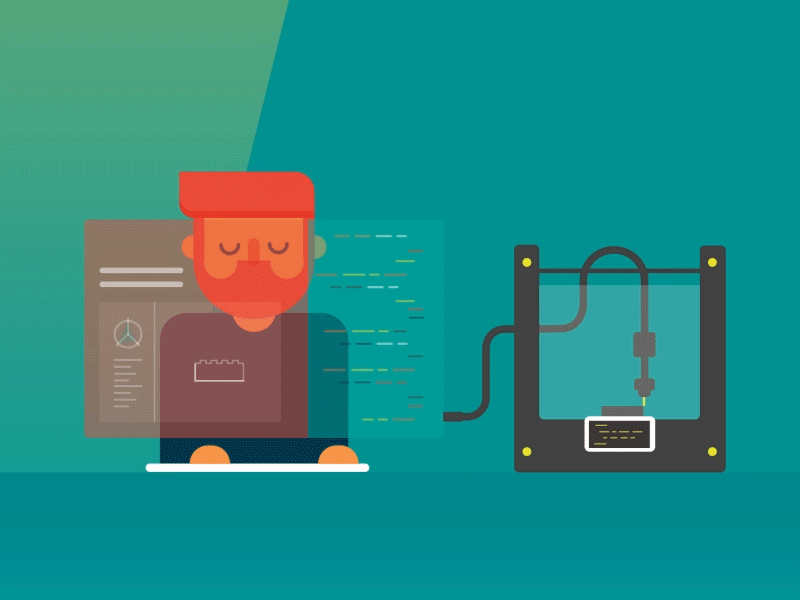

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\mysore\Desktop\VideoGame Analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data= pd.read_csv(r'C:\Users\mysore\Desktop\VideoGame Analysis\vgsales.csv')
data.head(5)

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [4]:
drop_row_index = data[data['Year'] > 2015].index
data = data.drop(drop_row_index)

In [5]:
data

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16250 rows x 11 columns]

In [6]:
data.shape

(16250, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


In [8]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# What genre games have been made the most?

In [9]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

In [10]:
data['Publisher'].value_counts()

Electronic Arts                 1331
Activision                       961
Ubisoft                          907
Namco Bandai Games               892
Konami Digital Entertainment     824
                                ... 
Nichibutsu                         1
Evolution Games                    1
CPG Products                       1
Culture Publishers                 1
Ivolgamus                          1
Name: Publisher, Length: 566, dtype: int64

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

# Which year had the most game release?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

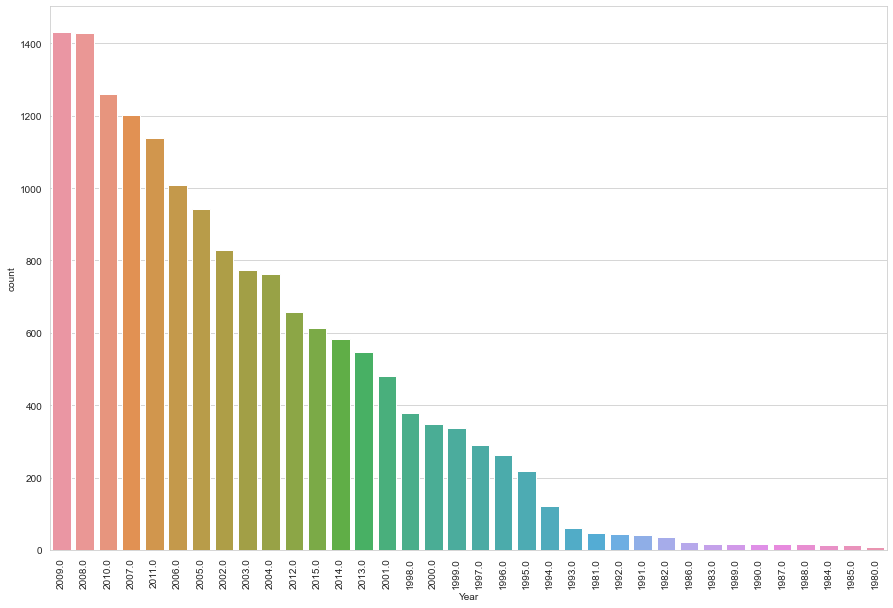

In [12]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

# Top 5 years games release by genre.

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

# Which year had the highest sales worldwide?

In [14]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
data_year

Year  Global_Sales
0   1980.0         11.38
1   1981.0         35.77
2   1982.0         28.86
3   1983.0         16.79
4   1984.0         50.36
5   1985.0         53.94
6   1986.0         37.07
7   1987.0         21.74
8   1988.0         47.22
9   1989.0         73.45
10  1990.0         49.39
11  1991.0         32.23
12  1992.0         76.16
13  1993.0         45.98
14  1994.0         79.17
15  1995.0         88.11
16  1996.0        199.15
17  1997.0        200.98
18  1998.0        256.47
19  1999.0        251.27
20  2000.0        201.56
21  2001.0        331.47
22  2002.0        395.52
23  2003.0        357.85
24  2004.0        419.31
25  2005.0        459.94
26  2006.0        521.04
27  2007.0        611.13
28  2008.0        678.90
29  2009.0        667.30
30  2010.0        600.45
31  2011.0        515.99
32  2012.0        363.54
33  2013.0        368.11
34  2014.0        337.05
35  2015.0        264.44

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

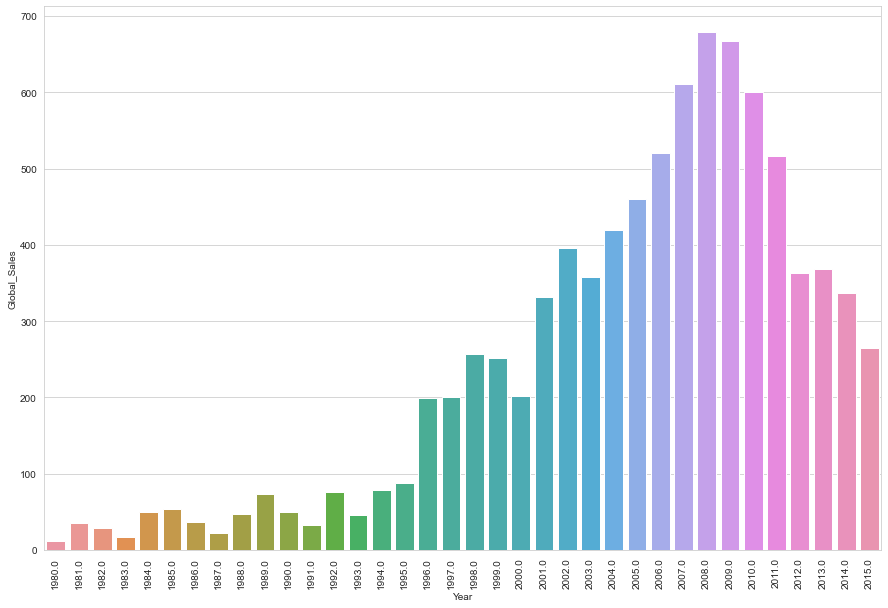

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)

Answer is =>
<br>1.2008.0 678.90</br>
<br>2.2009.0 667.30</br>
<br>3.2007.0 611.13</br>
<br>4.2010.0 600.45</br>
<br>5.2006.0 521.04</br>

interesting 2006 was not in top 5 game release year but it is in top 5 highest sale year

# Which genre game has been released the most in a single year?

In [16]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
year_max_genre
# year_max_genre

Year     Genre  count
0   1980.0      Misc      4
1   1981.0    Action     25
2   1982.0    Action     18
3   1983.0    Action      7
4   1984.0   Shooter      3
5   1985.0    Puzzle      4
6   1986.0  Platform      6
7   1987.0    Sports      4
8   1988.0  Platform      4
9   1989.0    Puzzle      5
10  1990.0    Sports      3
11  1991.0    Sports      7
12  1992.0  Fighting      7
13  1993.0  Platform     11
14  1994.0    Sports     22
15  1995.0    Sports     29
16  1996.0    Sports     52
17  1997.0    Sports     46
18  1998.0    Sports     70
19  1999.0    Sports     62
20  2000.0    Sports     81
21  2001.0    Sports     96
22  2002.0    Sports    188
23  2003.0    Action    144
24  2004.0    Action    125
25  2005.0    Action    192
26  2006.0    Action    184
27  2007.0    Action    211
28  2008.0    Action    221
29  2009.0    Action    272
30  2010.0    Action    226
31  2011.0    Action    239
32  2012.0    Action    266
33  2013.0    Action    148
34  2014.0    Action    186
35  2015.0    Action    255

In [17]:
genre = year_max_genre['Genre'].values
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

In [18]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

# Which genre game has sold the most in a single year?

In [19]:
year_sale_dx = data.groupby(by=['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)
# year_sale_max

In [20]:
genre = year_sale_max['Genre']

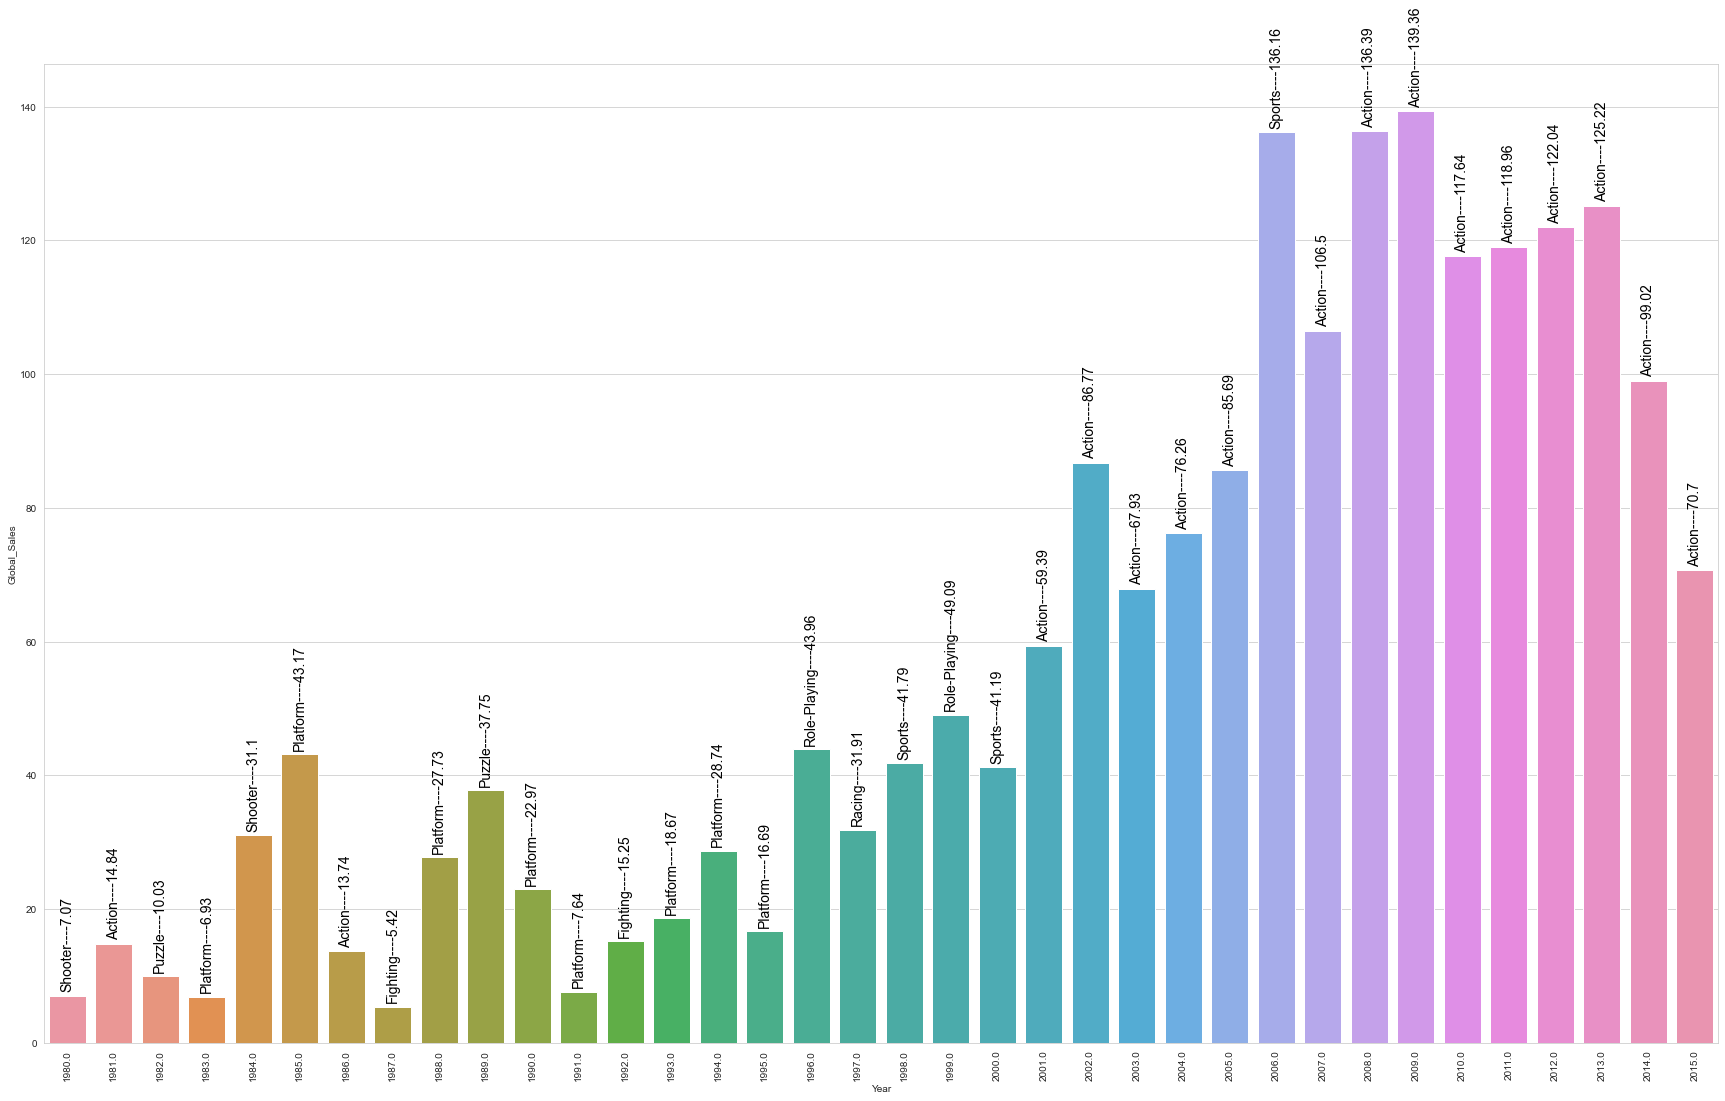

In [21]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='Global_Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' +str(round(value, 2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

Answer is => 2009 Action ---> 139.36 million and 2008 Action ---> 136.39 miliion

# Which genre game have the highest sale price globally

In [22]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

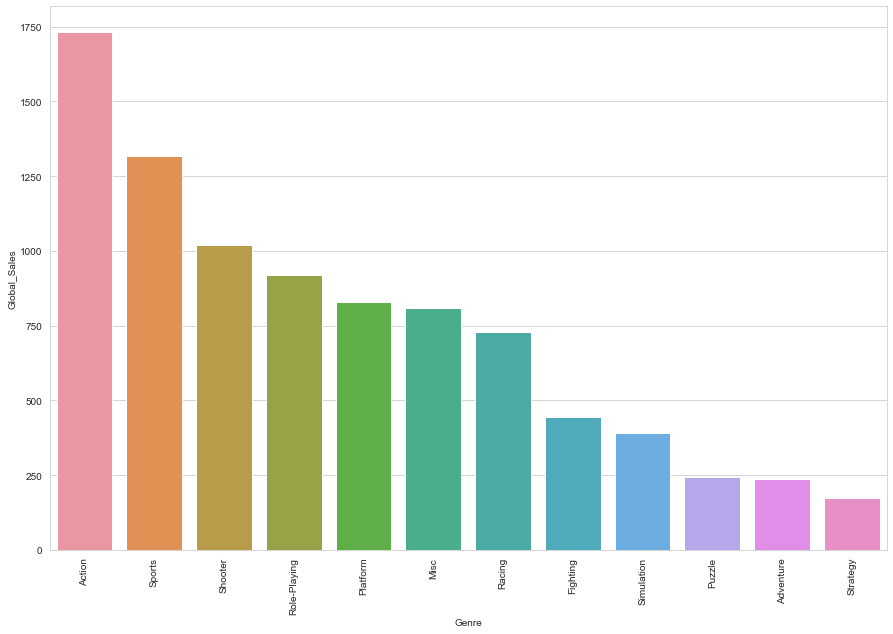

In [23]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)

Action and Sports are always in top. but in third whis is remarkable "Shooter", in count which was no 5

# Which platfrom have the highest sale price globally

In [24]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)

In [25]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

The winner is PS2

# Which individual game have the highest sale price globally?

In [26]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)

In [27]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

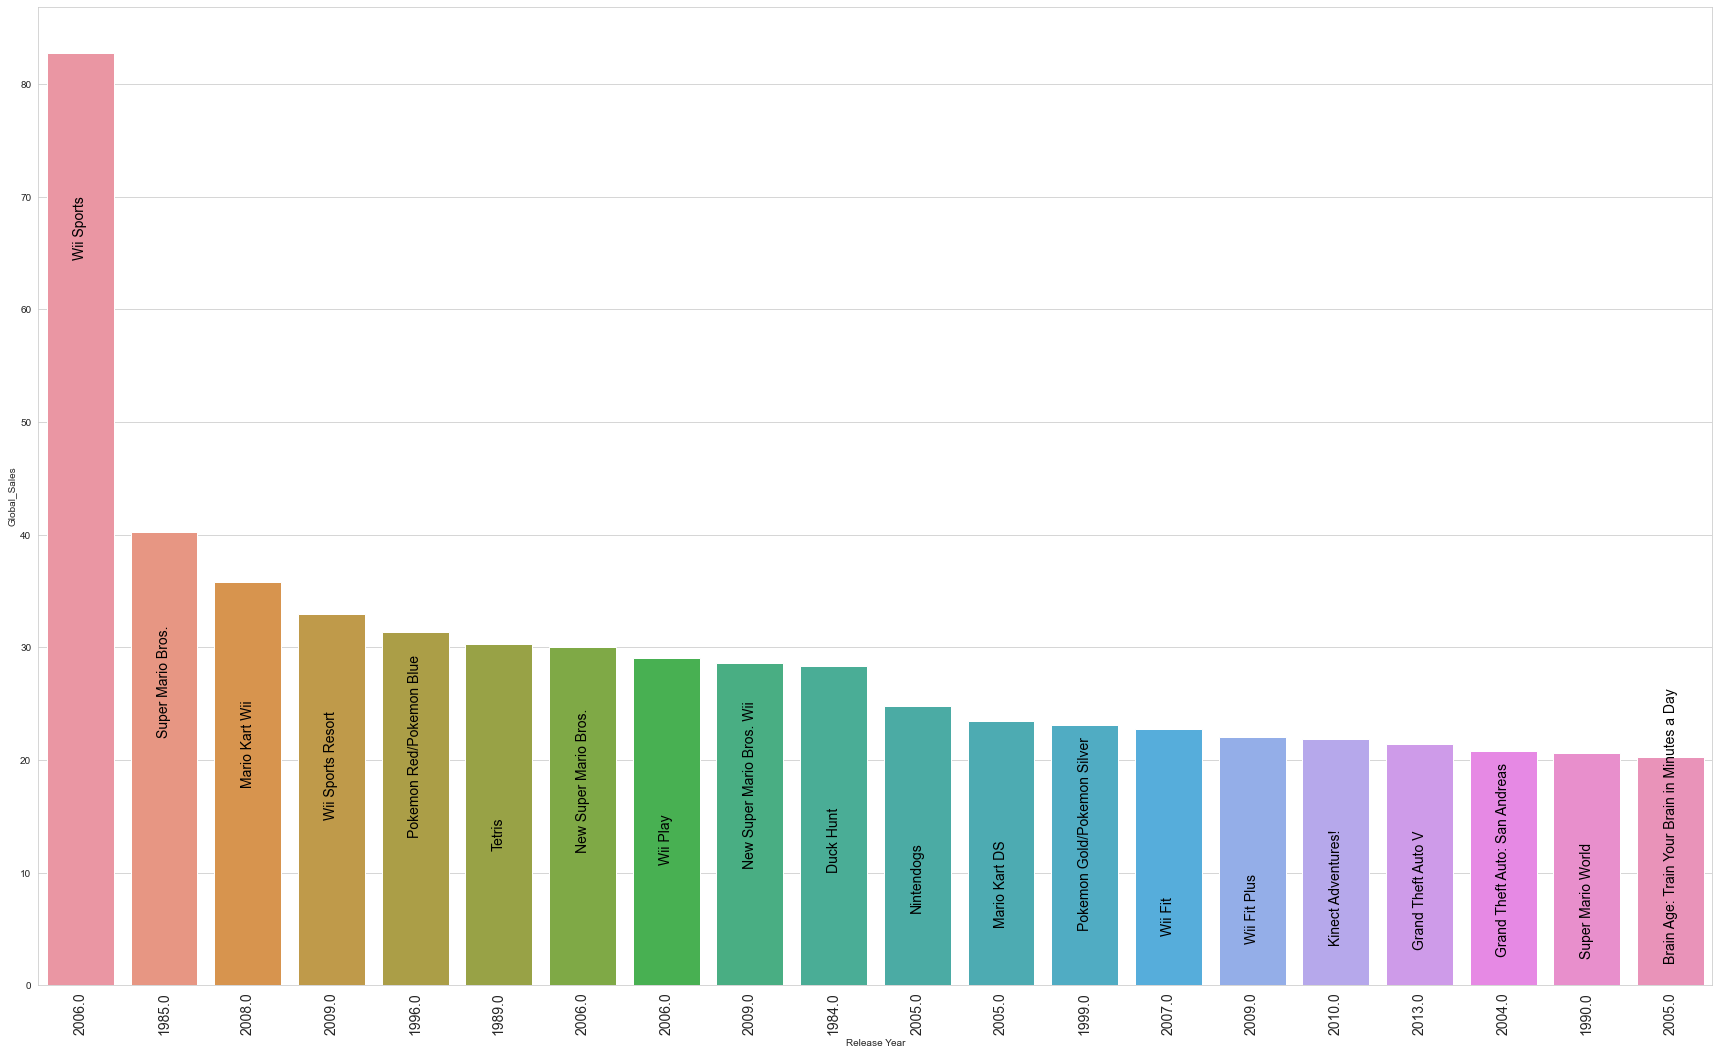

In [28]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Release Year')
plt.show()

And The winner is Wii Sports

# Sales compearison by genre

In [29]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

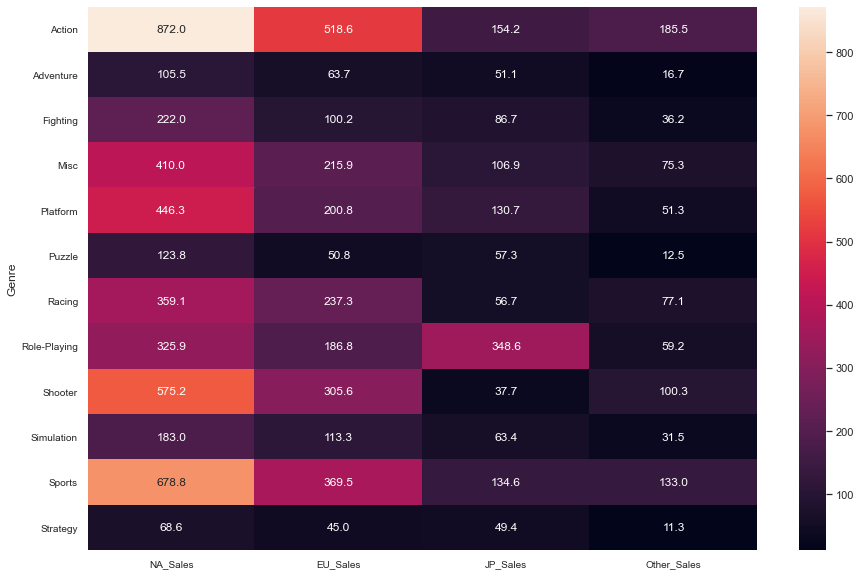

In [30]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [31]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

Genre Sale_Area  Sale_Price
0     Action  NA_Sales      871.96
1  Adventure  NA_Sales      105.46
2   Fighting  NA_Sales      221.99
3       Misc  NA_Sales      410.02
4   Platform  NA_Sales      446.26

In [32]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)

See, Here Action Sports and Shooter have much sales compare with others. and North America (NA_sales) have heights sales all the time. Its look like they love video games most

# Sales compearison by platform

In [33]:
comp_platform = data[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      Wii     41.49     29.02      3.77         8.46
1      NES     29.08      3.58      6.81         0.77
2      Wii     15.85     12.88      3.79         3.31
3      Wii     15.75     11.01      3.28         2.96
4       GB     11.27      8.89     10.22         1.00

In [34]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()

In [35]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       90.60
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.04
3       DC  NA_Sales        5.43
4       DS  NA_Sales      390.44

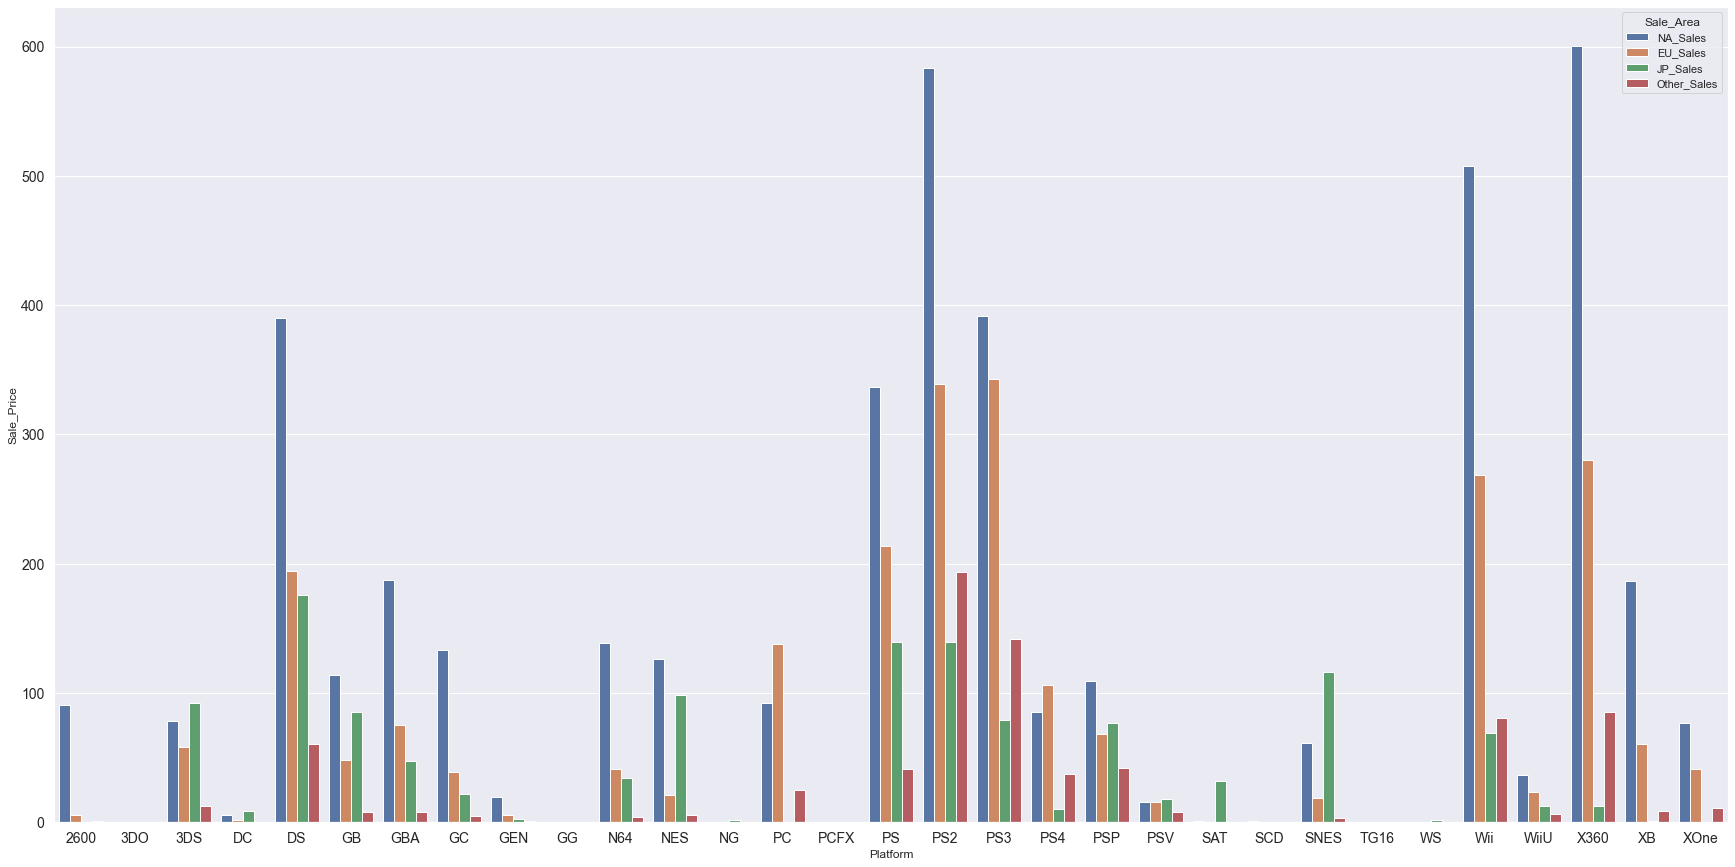

In [36]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

It's clearly shown that X360, Wii, and PS are market leader. and north america always top. i have a question in my mind why they play video games most?

# 12.Top 20 Publisher

In [37]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

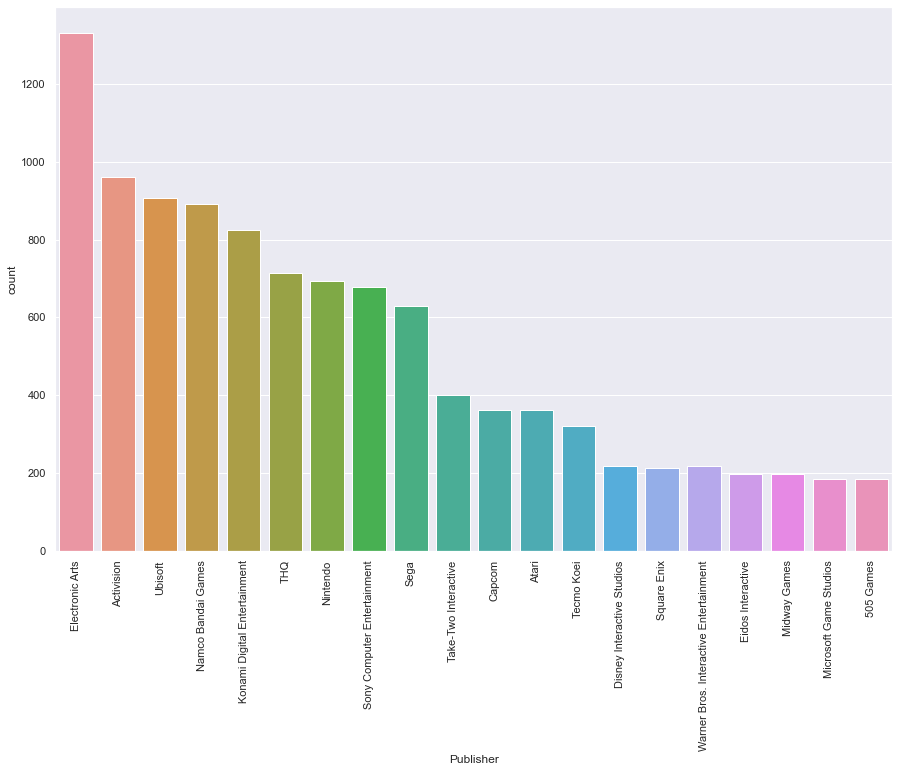

In [38]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

# Top global sales by publisher

In [39]:
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

In [40]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

# 14. publisher comperison

In [41]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()


Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  Nintendo     41.49     29.02      3.77         8.46         82.74
1  Nintendo     29.08      3.58      6.81         0.77         40.24
2  Nintendo     15.85     12.88      3.79         3.31         35.82
3  Nintendo     15.75     11.01      3.28         2.96         33.00
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [42]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
#comp_publisher

In [43]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

Publisher    Sale_Area  Sale_Price
0                      Nintendo     NA_Sales      815.71
1               Electronic Arts     NA_Sales      591.43
2                    Activision     NA_Sales      428.03
3   Sony Computer Entertainment     NA_Sales      262.79
4                       Ubisoft     NA_Sales      249.31
..                          ...          ...         ...
75   Disney Interactive Studios  Other_Sales       13.18
76            Eidos Interactive  Other_Sales        8.02
77                    LucasArts  Other_Sales       10.50
78           Bethesda Softworks  Other_Sales        9.87
79                 Midway Games  Other_Sales        5.74

[80 rows x 3 columns]

In [44]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

# Top publisher by Count each year

In [45]:
top_publisher =  data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx =  top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count  = top_publisher_count.drop_duplicates(subset=["Year", "Count"], keep='last').reset_index(drop=True)

In [46]:
publisher= top_publisher_count['Publisher']

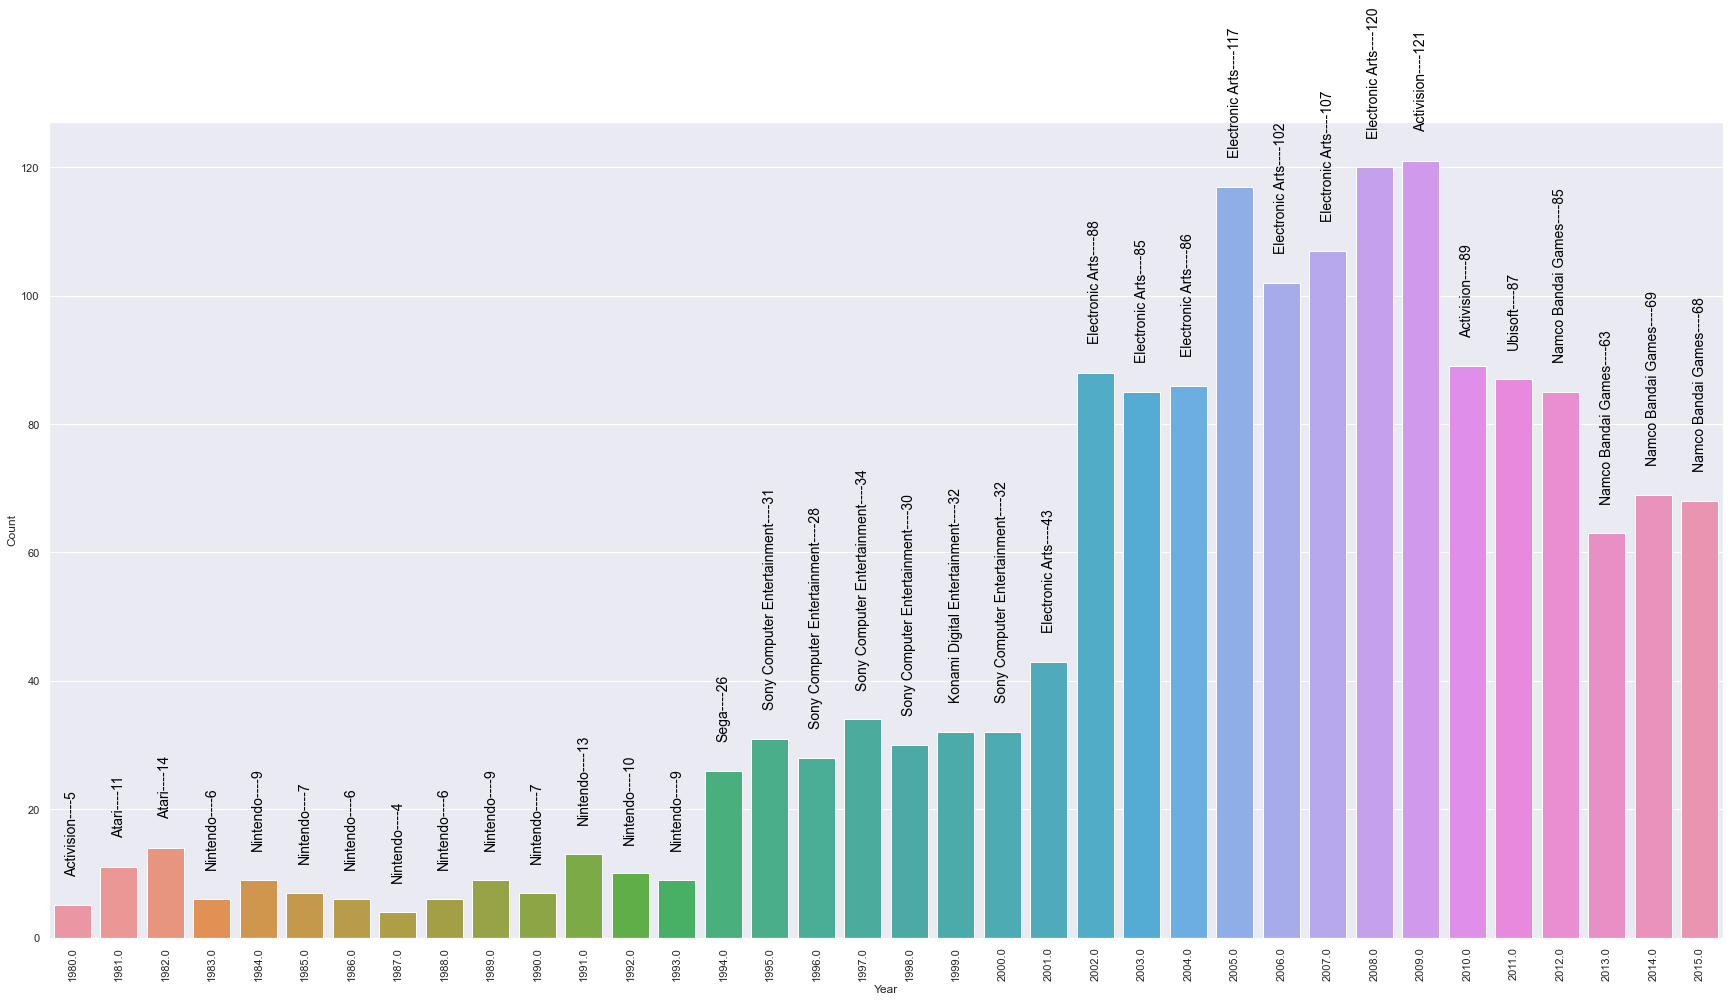

In [47]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#     print(asd)
    g.text(index, value + 5, str(publisher[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(rotation=90)
plt.show()

# Total revenue by region

In [48]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

region     sale
0     NA_Sales  4370.02
1     EU_Sales  2407.37
2     JP_Sales  1277.27
3  Other_Sales   789.98

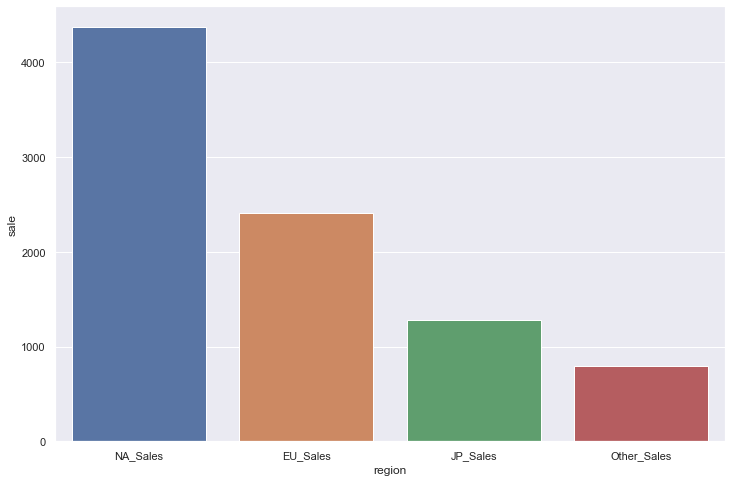

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)

# pie chart of region sale

In [50]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x15876a18>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

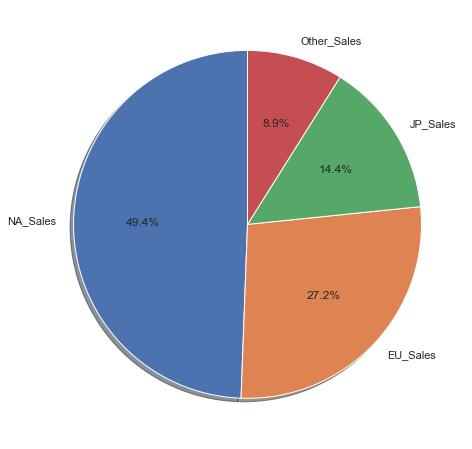

In [51]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

North America almost Cover 50% of sales.

# Sales Histogram

C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

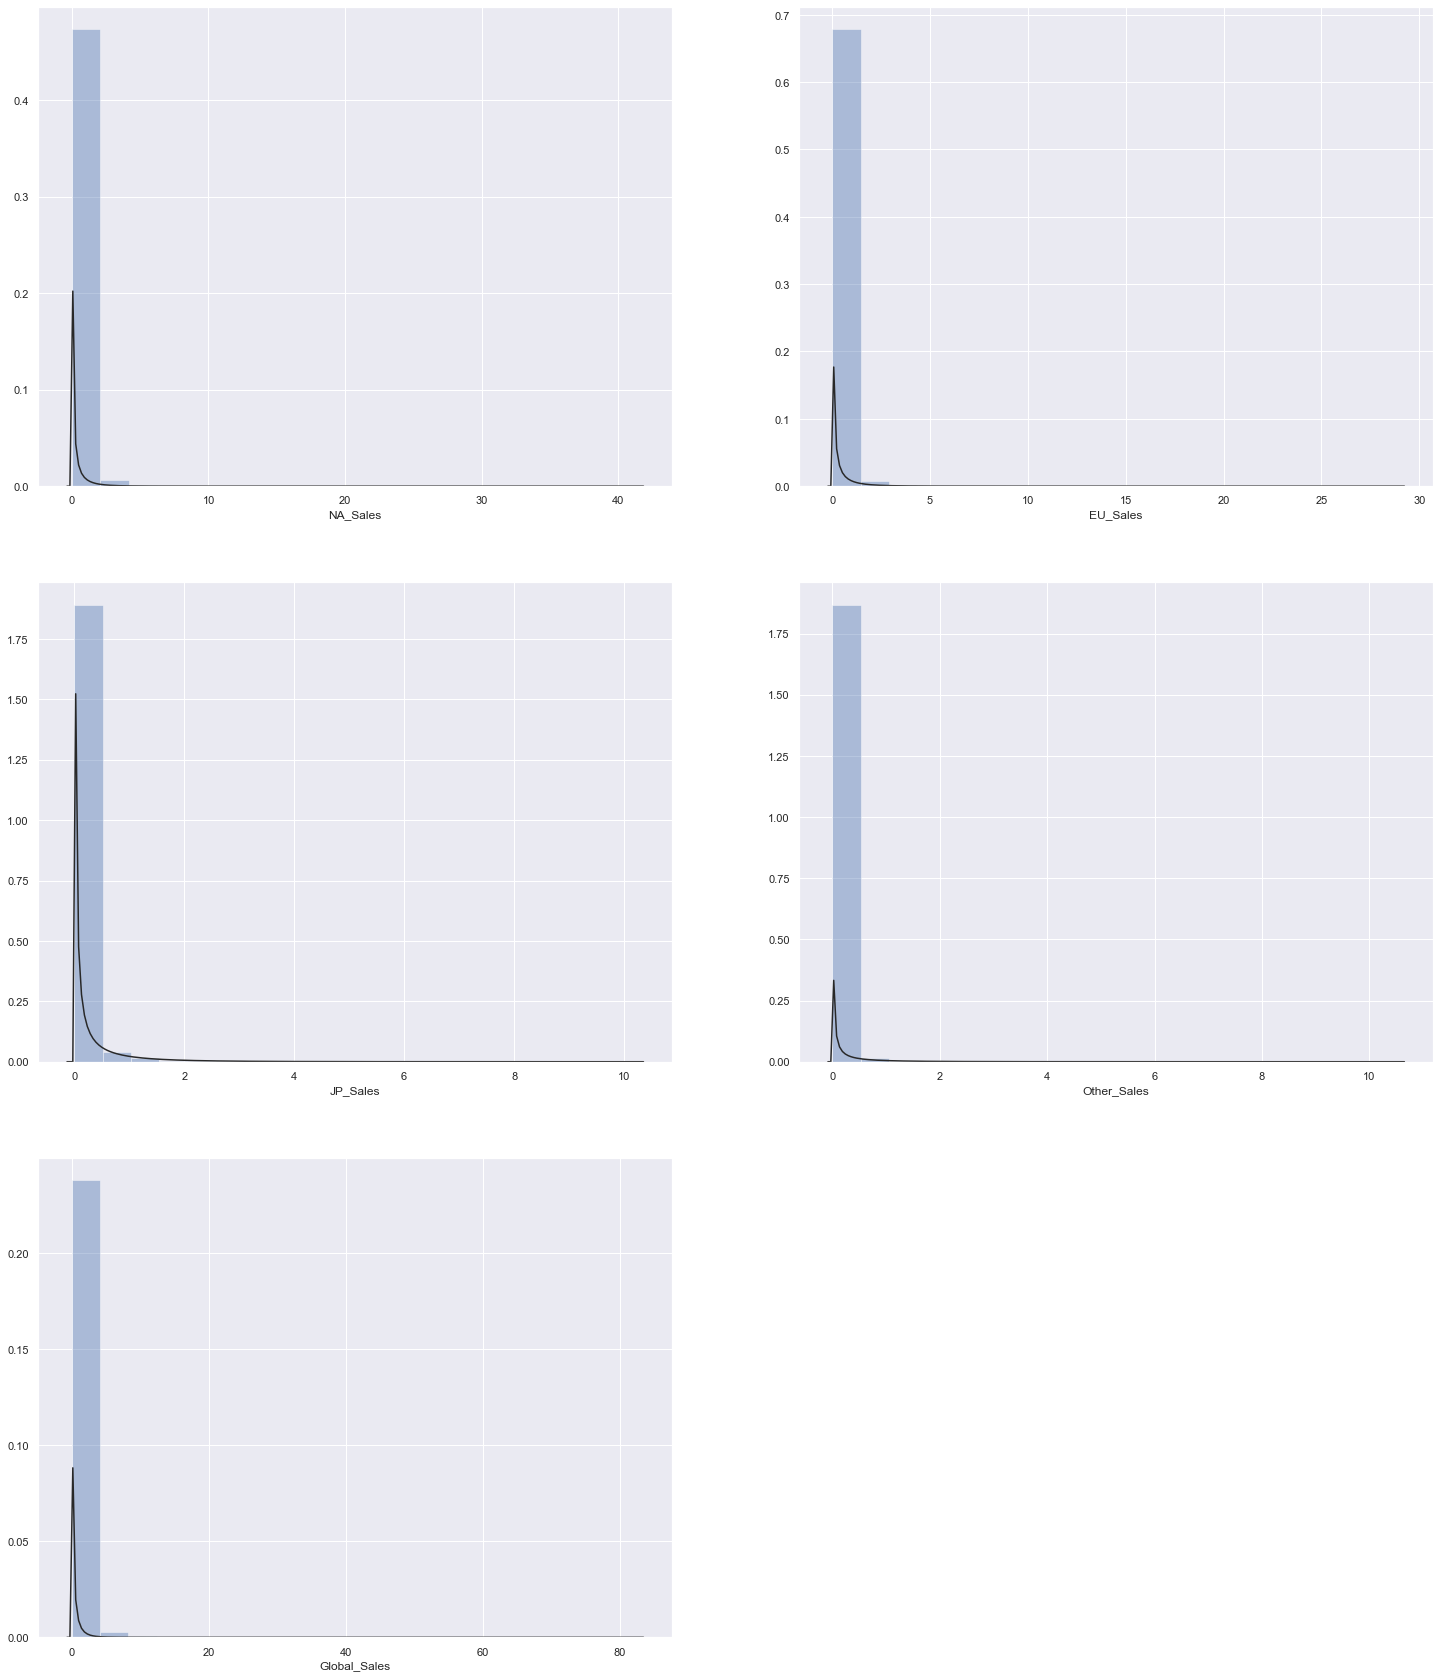

In [52]:
# sns.distplot(data['NA_Sales'],  kde=False, fit=stats.gamma);
# sns.distplot(data['EU_Sales'],  kde=False, fit=stats.gamma);
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(data[column], bins=20, kde=False, fit=stats.gamma)

# Distribution After log transformation

In [53]:
data_hist_log = data.copy()

In [54]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

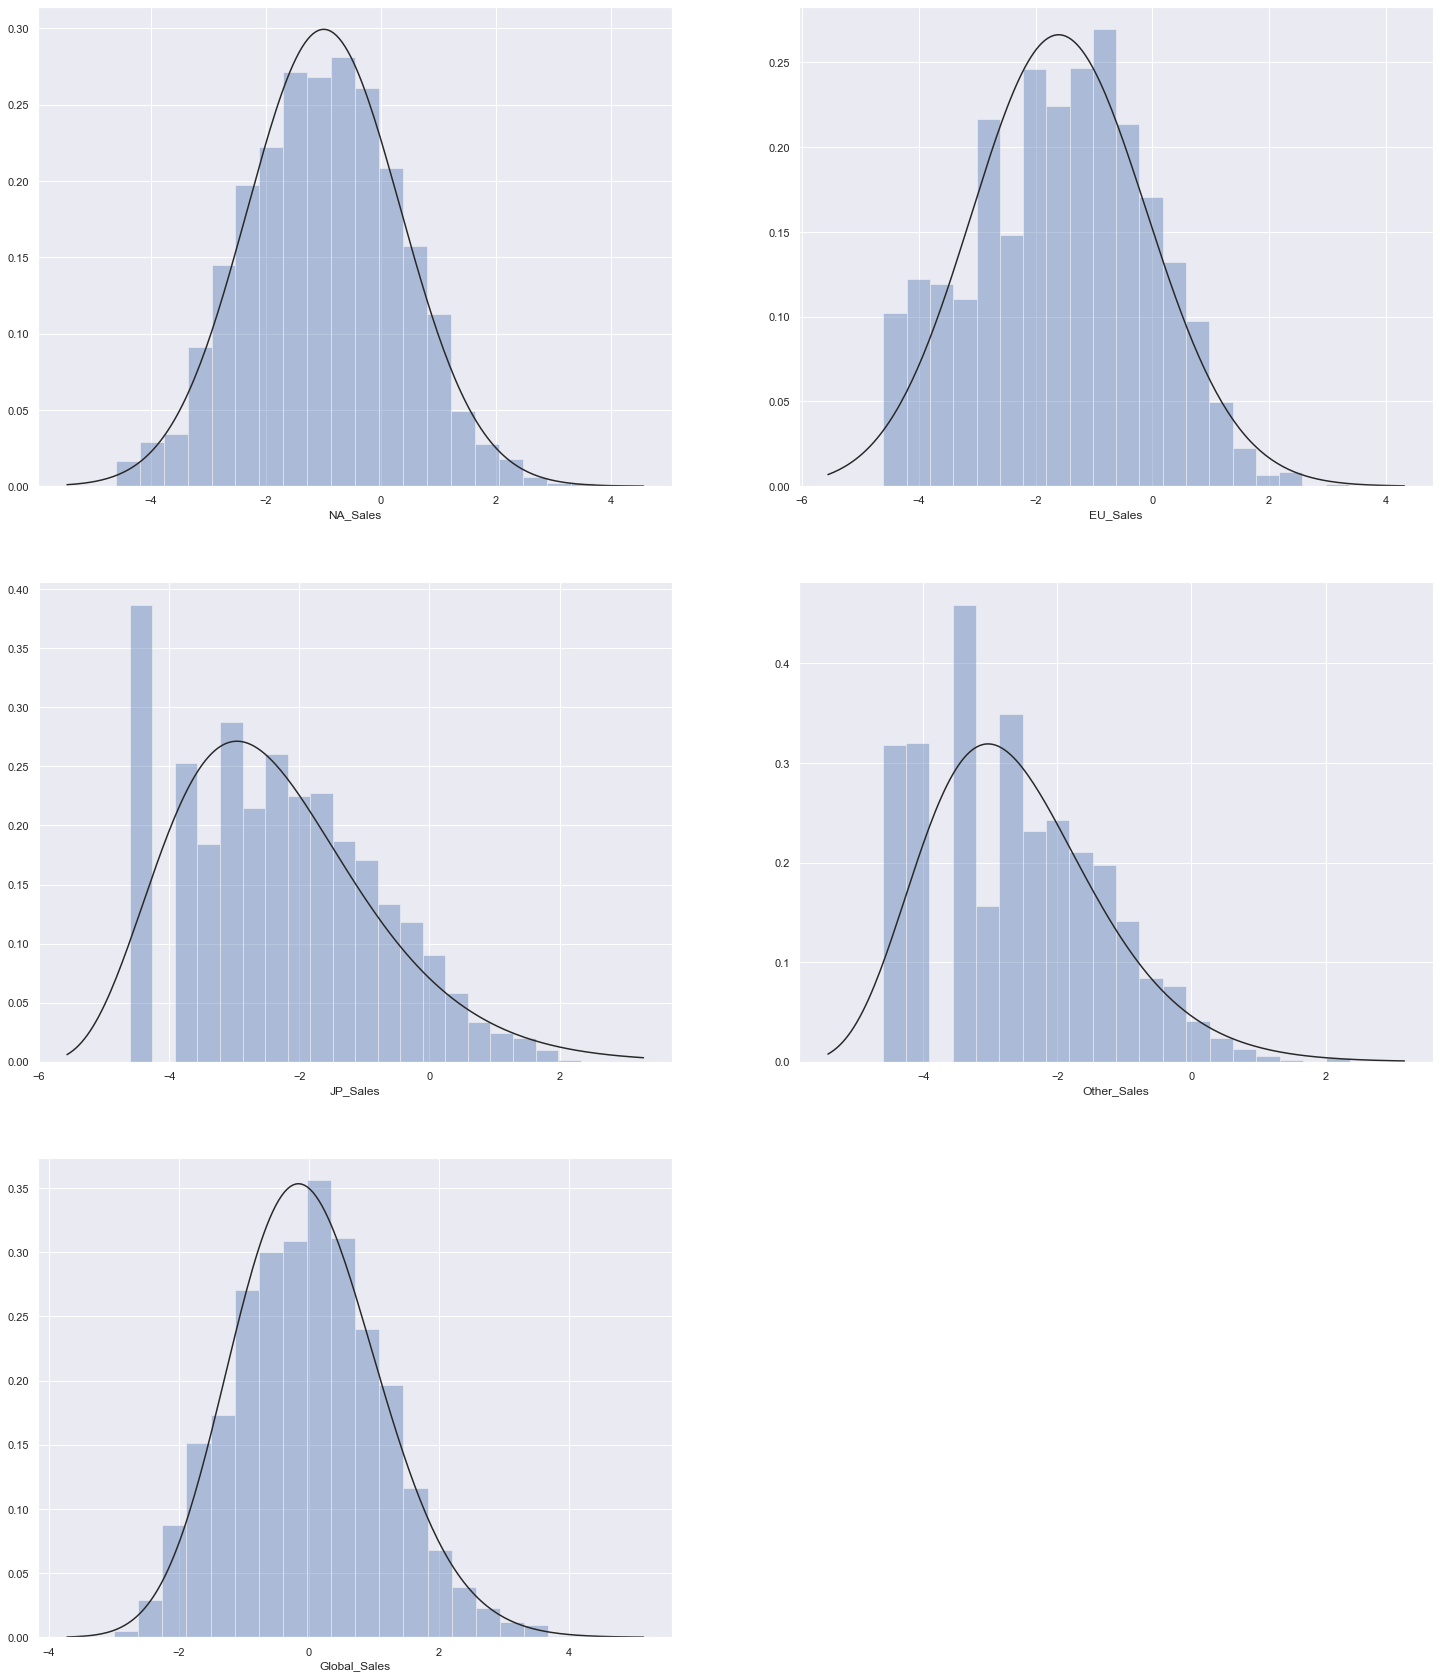

In [55]:
plt.figure(figsize=(25,30))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

You can see their skewness and central tendency. we can say that our almost all data are right skewed and symmetric skewed after log transformation



# Relations of columns

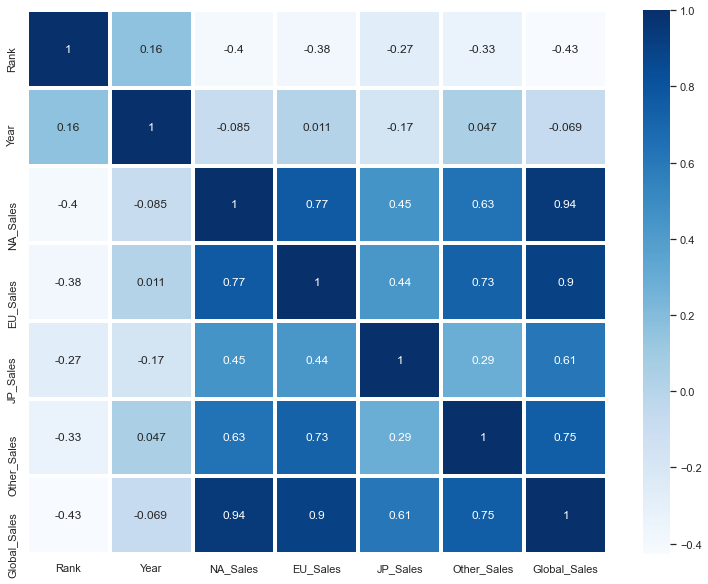

In [56]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

We can NA_Sales and EU_sales have much effect in Global_Sales. And NA_Sales and EU_sales are mostly corelated

# Pair plot

In [57]:
data_pair = data.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
16593  2002.0      GBA      Platform      0.01      0.00         0.00
16594  2003.0       GC       Shooter      0.01      0.00         0.00
16595  2008.0      PS2        Racing      0.00      0.00         0.00
16596  2010.0       DS        Puzzle      0.00      0.01         0.00
16597  2003.0      GBA      Platform      0.01      0.00         0.00

[16250 rows x 6 columns]

In [58]:
sns.pairplot(data_pair, hue='Genre')

# log work

In [59]:
data_pair_log = data_pair.copy()

In [60]:
sale_columns = ['NA_Sales', 'EU_Sales', 'Other_Sales']

In [61]:
data_pair_log = data_pair_log[data_pair_log.NA_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.EU_Sales != 0]
data_pair_log = data_pair_log[data_pair_log.Other_Sales != 0]

In [62]:
data_pair_log

Year Platform         Genre  NA_Sales  EU_Sales  Other_Sales
0      2006.0      Wii        Sports     41.49     29.02         8.46
1      1985.0      NES      Platform     29.08      3.58         0.77
2      2008.0      Wii        Racing     15.85     12.88         3.31
3      2009.0      Wii        Sports     15.75     11.01         2.96
4      1996.0       GB  Role-Playing     11.27      8.89         1.00
...       ...      ...           ...       ...       ...          ...
14071  1998.0       PC  Role-Playing      0.01      0.02         0.01
14183  2014.0      PS3        Racing      0.02      0.01         0.01
14185  2011.0       PC        Puzzle      0.01      0.02         0.01
14267  2007.0       PC        Puzzle      0.01      0.02         0.01
14299  2009.0       PC      Strategy      0.01      0.02         0.01

[7893 rows x 6 columns]

In [63]:
data_pair_log['NA_Sales'] = np.log(data_pair_log['NA_Sales']);
data_pair_log['EU_Sales'] = np.log(data_pair_log['EU_Sales']);
data_pair_log['Other_Sales'] = np.log(data_pair_log['Other_Sales']);

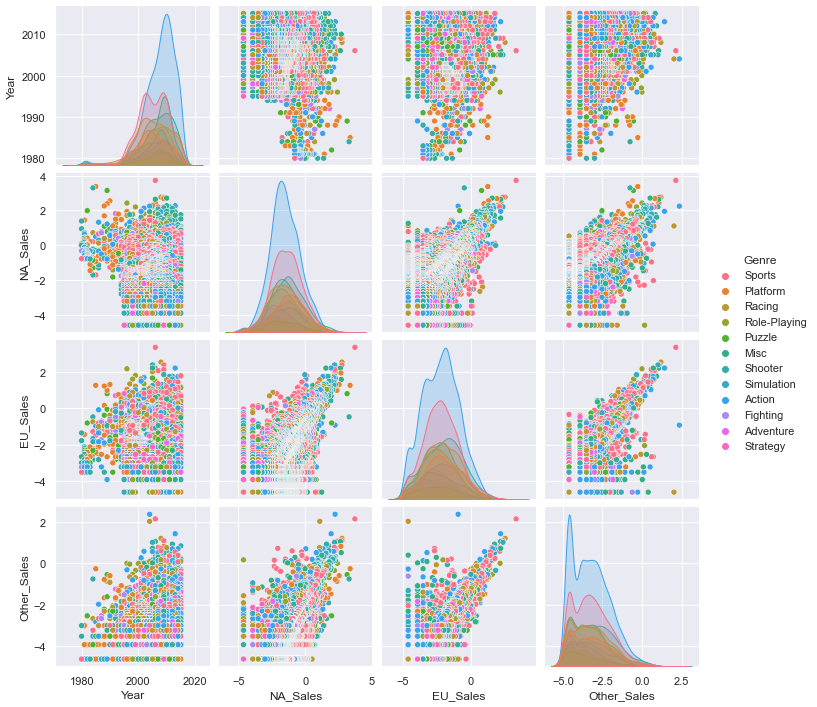

In [64]:

sns.pairplot(data_pair_log, hue='Genre',  palette="husl")

# Thanks You